In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
xls = pd.ExcelFile('./training-source.xlsx')

In [ ]:
df = pd.read_excel(xls)

# df.drop(['time', 'time.1', 'o', 'h', 'l', 'v'], axis=1)
df

,time,totalRetweet,totalReply,totalLike,totalFollowers,avgRetweet,avgReply,avgLike,avgFollowers,tweets number,...,close_price,date,high_price,low_price,num_trades,open_price,quote_volume,symbol,time.3,rate_of_change
0,1651293600,-270874,0,1,1204490,-255,0,0,1134,1062,...,38546.72,2022-04-30T04:40:00.082321Z,38546.72,38534.99,284,38534.99,3.249808e+05,BTCUSDT,1651293600,0.083068
1,1651293900,-112305,1,4,1518437,-101,0,0,1377,1102,...,38555.88,2022-04-30T04:45:00.041533Z,38570.00,38540.00,479,38541.32,1.640427e+06,BTCUSDT,1651293900,0.023758
2,1651294200,-145446,0,-3,-613987,-132,0,0,-561,1094,...,38525.01,2022-04-30T04:50:00.019465Z,38537.61,38525.00,250,38537.61,1.683766e+05,BTCUSDT,1651294200,-0.080130
3,1651294500,-169572,-1,-8,-345868,-155,0,0,-316,1094,...,38544.49,2022-04-30T04:55:00.090326Z,38544.50,38537.13,412,38537.13,1.635323e+05,BTCUSDT,1651294500,0.050539
4,1651294800,-104252,-3,0,-235958,-88,0,0,-199,1184,...,38553.36,2022-04-30T05:00:00.016917Z,38553.36,38537.71,322,38537.71,2.496313e+05,BTCUSDT,1651294800,0.023007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,1651423800,483269,24,-1,-1055698,312,0,0,-683,1544,...,38584.16,2022-05-01T16:50:00.087045Z,38594.99,38576.83,842,38576.84,2.024342e+06,BTCUSDT,1651423800,0.001788
435,1651424100,450439,35,2,-1233033,279,0,0,-764,1612,...,38567.55,2022-05-01T16:55:00.081721Z,38592.37,38567.55,738,38585.34,4.839482e+05,BTCUSDT,1651424100,-0.043067
436,1651424400,370804,35,-7,-1735468,255,0,0,-1196,1451,...,38504.49,2022-05-01T17:00:00.026995Z,38512.92,38484.44,500,38485.60,1.233167e+06,BTCUSDT,1651424400,-0.163773
437,1651424700,157073,14,-8,522591,104,0,0,347,1505,...,38538.69,2022-05-01T17:05:00.029622Z,38547.51,38535.54,419,38535.55,4.369400e+05,BTCUSDT,1651424700,0.088742


<AxesSubplot:>

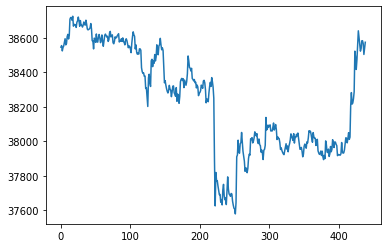

In [ ]:
df.close_price.plot()

In [ ]:
df = df[['totalRetweet', 'totalReply', 'totalLike', 'totalFollowers', 'avgRetweet', 'avgReply', 'avgLike', 'avgFollowers', 'tweets number', 'date', 'score', 'posCnt', 'negCnt', 'naCnt', 'base_volume', 'close_price', 'rate_of_change', 'num_trades']]
df = df.set_index(['date'], inplace=False)
df

,totalRetweet,totalReply,totalLike,totalFollowers,avgRetweet,avgReply,avgLike,avgFollowers,tweets number,score,posCnt,negCnt,naCnt,base_volume,close_price,rate_of_change,num_trades
date,,,,,,,,,,,,,,,,,
2022-04-30T04:40:00.082321Z,-270874,0,1,1204490,-255,0,0,1134,1062,0.500000,1,1,1,8.43296,38546.72,0.083068,284
2022-04-30T04:45:00.041533Z,-112305,1,4,1518437,-101,0,0,1377,1102,0.535714,7,6,1,42.54927,38555.88,0.023758,479
2022-04-30T04:50:00.019465Z,-145446,0,-3,-613987,-132,0,0,-561,1094,0.318182,7,15,0,4.37004,38525.01,-0.080130,250
2022-04-30T04:55:00.090326Z,-169572,-1,-8,-345868,-155,0,0,-316,1094,0.575000,10,7,3,4.24339,38544.49,0.050539,412
2022-04-30T05:00:00.016917Z,-104252,-3,0,-235958,-88,0,0,-199,1184,0.516129,11,10,10,6.47689,38553.36,0.023007,322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-01T16:50:00.087045Z,483269,24,-1,-1055698,312,0,0,-683,1544,0.446429,9,12,7,52.45898,38584.16,0.001788,842
2022-05-01T16:55:00.081721Z,450439,35,2,-1233033,279,0,0,-764,1612,0.333333,4,8,0,12.54226,38567.55,-0.043067,738
2022-05-01T17:00:00.026995Z,370804,35,-7,-1735468,255,0,0,-1196,1451,0.382353,6,10,1,32.03458,38504.49,-0.163773,500


In [ ]:
features = list(df.drop(['avgRetweet', 'avgReply', 'avgLike', 'avgFollowers', 'tweets number', 'totalRetweet', 'totalReply', 'totalLike', 'totalFollowers', 'rate_of_change', 'score'], axis=1).columns)
# features = list(df.drop(['avgRetweet', 'avgReply', 'avgLike', 'avgFollowers', 'tweets number', 'posCnt', 'negCnt', 'naCnt', 'base_volume', 'rate_of_change', 'num_trades', 'score'], axis=1).columns)
# features = list(df.drop(['avgRetweet', 'avgReply', 'avgLike', 'avgFollowers', 'tweets number', 'totalRetweet', 'totalReply', 'totalLike', 'totalFollowers', 'totalRetweet', 'totalReply', 'totalLike', 'totalFollowers', 'base_volume', 'rate_of_change', 'num_trades', 'score'], axis=1).columns)
# features = list(df.drop(['totalRetweet', 'totalReply', 'totalLike', 'totalFollowers', 'tweets number', 'o', 'h', 'l', 'v'], axis=1).columns)
df = df[features]
df

,posCnt,negCnt,naCnt,base_volume,close_price,num_trades
date,,,,,,
2022-04-30T04:40:00.082321Z,1,1,1,8.43296,38546.72,284
2022-04-30T04:45:00.041533Z,7,6,1,42.54927,38555.88,479
2022-04-30T04:50:00.019465Z,7,15,0,4.37004,38525.01,250
2022-04-30T04:55:00.090326Z,10,7,3,4.24339,38544.49,412
2022-04-30T05:00:00.016917Z,11,10,10,6.47689,38553.36,322
...,...,...,...,...,...,...
2022-05-01T16:50:00.087045Z,9,12,7,52.45898,38584.16,842
2022-05-01T16:55:00.081721Z,4,8,0,12.54226,38567.55,738
2022-05-01T17:00:00.026995Z,6,10,1,32.03458,38504.49,500


In [ ]:
totalDataSize = len(df)
testSize = round(totalDataSize * 0.7);
train = df[0:testSize]
test = df[testSize:]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

train = pd.DataFrame(scaler.fit_transform(train), columns = df.columns)
test = pd.DataFrame(scaler.fit_transform(test), columns = df.columns)

In [ ]:
train
test

,posCnt,negCnt,naCnt,base_volume,close_price,num_trades
0,0.142857,0.200000,0.285714,0.012481,0.229704,0.053584
1,0.238095,0.366667,0.285714,0.020098,0.243607,0.045424
2,0.380952,0.366667,0.285714,0.009293,0.272428,0.019584
3,0.190476,0.200000,0.142857,0.013050,0.234543,0.041888
4,0.190476,0.033333,0.000000,0.018360,0.156099,0.055896
...,...,...,...,...,...,...
127,0.380952,0.366667,0.500000,0.088107,0.923147,0.084455
128,0.142857,0.233333,0.000000,0.016607,0.900942,0.070311
129,0.238095,0.300000,0.071429,0.051522,0.816643,0.037944
130,0.047619,0.166667,0.214286,0.014447,0.862362,0.026928


In [ ]:
n = 20

features = list(train.drop(['close_price'], axis=1).columns)
features

X = []
y = []
indexes = []
norm_data_x = train[features]
norm_data_x

for i in range(0, len(train)-n):
    X.append(norm_data_x.iloc[i:i+n].values)
    y.append(train['close_price'].iloc[i+n])
    indexes.append(train.index[i+n])

In [ ]:
print(X[0])
print(y[0])
print(indexes)

[[0.02325581 0.01234568 0.00934579 0.00905657 0.00554203]
 [0.1627907  0.07407407 0.00934579 0.05741745 0.0219162 ]
 [0.1627907  0.18518519 0.         0.00329726 0.00268704]
 [0.23255814 0.08641975 0.02803738 0.00311773 0.0162902 ]
 [0.25581395 0.12345679 0.09345794 0.00628378 0.00873289]
 [0.09302326 0.08641975 0.00934579 0.01499627 0.02628264]
 [0.20930233 0.03703704 0.02803738 0.01302358 0.02754219]
 [0.13953488 0.04938272 0.01869159 0.00235912 0.01855739]
 [0.1627907  0.09876543 0.         0.00211868 0.00159543]
 [0.23255814 0.16049383 0.05607477 0.0021488  0.01326728]
 [0.20930233 0.2962963  0.06542056 0.00543593 0.01494668]
 [0.27906977 0.34567901 0.05607477 0.0070219  0.0171299 ]
 [0.37209302 0.17283951 0.02803738 0.00433748 0.02166429]
 [0.27906977 0.17283951 0.07476636 0.04155984 0.06322949]
 [0.37209302 0.2345679  0.05607477 0.02815208 0.03719876]
 [0.23255814 0.12345679 0.06542056 0.00554935 0.01016038]
 [0.23255814 0.11111111 0.05607477 0.00715178 0.00050382]
 [0.09302326 0

In [ ]:
X=np.array(X)
y=np.array(y)
# print(X.shape)
# print(y.shape)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

n_steps = n
n_features = len(features)
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=False, input_shape = (n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse', metrics=['mse', 'mape'])

In [ ]:
history = model.fit(X, y, batch_size=10, epochs=100)

Epoch 1/100
29/29 [==============================] - 1s 8ms/step - loss: 0.3103 - mse: 0.3103 - mape: 67973.9688
Epoch 2/100
29/29 [==============================] - 0s 7ms/step - loss: 0.0744 - mse: 0.0744 - mape: 1398196.7500
Epoch 3/100
29/29 [==============================] - 0s 6ms/step - loss: 0.0544 - mse: 0.0544 - mape: 1421906.0000
Epoch 4/100
29/29 [==============================] - 0s 6ms/step - loss: 0.0373 - mse: 0.0373 - mape: 1463039.7500
Epoch 5/100
29/29 [==============================] - 0s 7ms/step - loss: 0.0296 - mse: 0.0296 - mape: 1397519.6250
Epoch 6/100
29/29 [==============================] - 0s 7ms/step - loss: 0.0264 - mse: 0.0264 - mape: 1605355.8750
Epoch 7/100
29/29 [==============================] - 0s 6ms/step - loss: 0.0248 - mse: 0.0248 - mape: 1533659.3750
Epoch 8/100
29/29 [==============================] - 0s 6ms/step - loss: 0.0237 - mse: 0.0237 - mape: 1528148.1250
Epoch 9/100
29/29 [==============================] - 0s 6ms/step - loss: 0.0236 - 

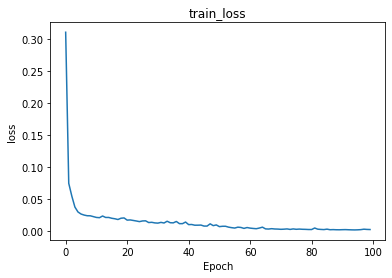

In [ ]:
import matplotlib.pyplot as plt

plt.title('train_loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.plot(history.history["loss"])

In [ ]:
X = []
y = []
indexes = []
norm_data_x = test[features]
# norm_data_x = norm_data[features]

for i in range(0, len(test)-n):
    X.append(norm_data_x.iloc[i:i+n].values)
    y.append(test['close_price'].iloc[i+n])
    indexes.append(test.index[i+n])

X=np.array(X)
y=np.array(y)

In [ ]:
predictions = model.predict(X)
predictions = pd.DataFrame(predictions).rename(columns={0: 'prediction'})

Y_test = pd.DataFrame(y).rename(columns={0: 'real value'})

final = pd.concat([predictions,Y_test],axis=1)
final['mae'] = abs(final['prediction'] - final['real value'])
final['diff'] = final['prediction'] - final['real value']
final

,prediction,real value,mae,diff
0,0.986459,0.061132,0.925326,0.925326
1,0.992607,0.102493,0.890114,0.890114
2,0.992153,0.123080,0.869073,0.869073
3,0.994369,0.152664,0.841706,0.841706
4,1.017779,0.200120,0.817658,0.817658
...,...,...,...,...
107,0.591785,0.923147,0.331362,-0.331362
108,0.613963,0.900942,0.286979,-0.286979
109,0.630054,0.816643,0.186590,-0.186590
110,0.641095,0.862362,0.221268,-0.221268


In [ ]:
# final
predictions

# test
# norm_data_x[n:len(test)].reset_index(drop=True)
# norm_data = norm_data_x[n:len(test)].reset_index(drop=True)

norm_result_data = pd.concat([norm_data_x[n:len(test)].reset_index(drop=True), predictions], axis=1)
norm_result_data

# norm_data
# scaler.inverse_transform(norm_result_data)

,posCnt,negCnt,naCnt,base_volume,num_trades,prediction
0,0.285714,0.233333,0.285714,0.018617,0.017408,0.986459
1,0.428571,0.500000,0.285714,0.019379,0.025160,0.992607
2,0.380952,0.300000,0.142857,0.033642,0.048008,0.992153
3,0.476190,0.433333,0.571429,0.014885,0.047192,0.994369
4,0.380952,0.266667,0.285714,0.013255,0.018632,1.017779
...,...,...,...,...,...,...
107,0.380952,0.366667,0.500000,0.088107,0.084455,0.591785
108,0.142857,0.233333,0.000000,0.016607,0.070311,0.613963
109,0.238095,0.300000,0.071429,0.051522,0.037944,0.630054
110,0.047619,0.166667,0.214286,0.014447,0.026928,0.641095


In [ ]:
result = pd.DataFrame(scaler.inverse_transform(norm_result_data), columns=np.append(df.drop(['close_price'], axis=1).columns, 'prediction'))

result = result.drop(features, axis=1)

result = df[len(df)-len(result):].reset_index(drop=True).join(result)
# result.index = result.index + len(df)-len(result)
result


,posCnt,negCnt,naCnt,base_volume,close_price,num_trades,prediction
0,7,8,4,13.66432,37939.33,349,7474.430521
1,10,16,4,14.09007,37970.27,406,7519.637499
2,9,10,2,22.05258,37985.67,574,7516.300927
3,11,14,8,11.58133,38007.80,568,7532.597231
4,9,9,4,10.67117,38043.30,358,7704.725427
...,...,...,...,...,...,...,...
107,9,12,7,52.45898,38584.16,842,4572.393891
108,4,8,0,12.54226,38567.55,738,4735.470874
109,6,10,1,32.03458,38504.49,500,4853.784849
110,2,6,3,11.33679,38538.69,419,4934.967901


<AxesSubplot:>

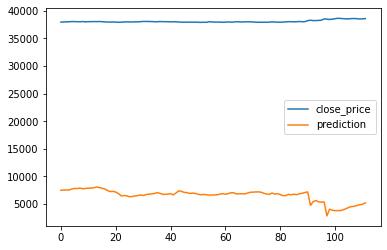

In [ ]:
result.drop(features, axis=1).plot()